Note: As of May 2023, there have been some issues with TensorFlow versions 2.9-2.12
with the following code.
However, these seemed to have been fixed in version 2.13+.
TensorFlow version 2.13 is available in tf-nightly as of May 2023 (will be default in Google Colab soon).
Therefore, to prevent errors we'll install tf-nightly first.
Install tf-nightly (required until 2.13.0+ is the default in Google Colab)

In [1]:
# !pip install tensorflow==2.9.2
!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.0/491.0 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.0/441.0 kB 48.5 MB/s eta 0:00:00


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


TensorFlow version: 2.14.0-dev20230701
Notebook last run (end-to-end): 2023-07-02 05:24:18.515126


In [ ]:
tf.__version__

'2.14.0-dev20230701'

# Milestone project 1: Food vision Big

## check GPU

Google colab offers free GPU not all of them are compatible with the mixed precision training

Google Colab offers:
* k80 (not compatible)
*p100(not compatible)
* Tesla T4 (compatible)

so mixed precision training need the GPU compatibility of above `7.0`
older gpu can not perform well on the math problems and precision training


**[Mixed precision training](www.tensorflow.org/guide/mixed_precision):** Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory.so it uses small floating numbers to save the memory and to run the task faster this improves the GPU speed by 3x.


In [ ]:
!nvidia-smi

Sat Jul  1 15:41:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper Functions

In past sessions we've created a bunch of helper functions we will import them through github

In [8]:
#download the helper_functions.py
!wget https://raw.githubusercontent.com/rajtiwariee/helper_functions/master/helper_functions.py?token=GHSAT0AAAAAACDB4BKHY6HSVNJLUP45CEZCZFBDINA
!mv helper_functions.py?token=GHSAT0AAAAAACDB4BKHY6HSVNJLUP45CEZCZFBDINA helper_functions.py

--2023-07-02 05:43:53--  https://raw.githubusercontent.com/rajtiwariee/helper_functions/master/helper_functions.py?token=GHSAT0AAAAAACDB4BKHY6HSVNJLUP45CEZCZFBDINA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py?token=GHSAT0AAAAAACDB4BKHY6HSVNJLUP45CEZCZFBDINA’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-02 05:43:54 (83.7 MB/s) - ‘helper_functions.py?token=GHSAT0AAAAAACDB4BKHY6HSVNJLUP45CEZCZFBDINA’ saved [10246/10246]



In [9]:
#Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback,unzip_data,plot_loss_curves,compare_historys

##Use Tensorflow Datasets to download data

if you want to get an anatomy of tensorflow datasets (tfds) visit this guide : https://www.tensorflow.org/datasets/overview

Tensorflow datasets allow us to download the data in tensor format which is ready to build for the models

In [10]:
#Get tensorflow datasets
import tensorflow_datasets as tfds

In [5]:
#List all availabe datasets
datasets_list = tfds.list_builders()
print('food101' in datasets_list)

True


In [6]:
#load in the data
(train_data, test_data) , data_info = tfds.load(name = 'food101',
                                                split = ['train','validation'],
                                                shuffle_files=True,
                                                as_supervised= True, #data gets return in tuple format (data,label))
                                                with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9JCC25/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9JCC25/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the food 101 data from Tensorflow datasets

To become one with the data we want to find:

* Class names
* The shape of our input data(image tensors)
* The datatype of our input data
* what are our labels look like (are they one hot encoded or are they label encoded)
* do the labels match up with the class names

In [11]:
#Features of food101 from datasets
data_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [12]:
class_names = data_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [13]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
#Take one sample of the train data
train_data_one_sample = train_data.take(1) #samples are in format (images, label)

In [15]:
#what does our sample data look like
train_data_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [16]:
#output info of our training sample
for image, label in train_data_one_sample:
  print(f"""
  Image shape : {image.shape},
  The datatype of our image: {image.dtype},
  Target class for food101 :{label} #our label is not one hot encoded we need to use categorical cross entropy
  class names (str form) :{class_names[label.numpy()]}
  """)


  Image shape : (512, 512, 3),
  The datatype of our image: <dtype: 'uint8'>,
  Target class for food101 :8 #our label is not one hot encoded we need to use categorical cross entropy
  class names (str form) :bread_pudding
  


In [17]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[18,  6,  8],
        [18,  6,  8],
        [18,  6,  8],
        ...,
        [30, 15, 22],
        [29, 14, 21],
        [26, 11, 18]],

       [[22, 10, 12],
        [21,  9, 11],
        [20,  8, 10],
        ...,
        [35, 20, 27],
        [31, 16, 23],
        [26, 11, 18]],

       [[23, 13, 14],
        [21, 11, 12],
        [19,  9, 10],
        ...,
        [39, 26, 33],
        [36, 21, 28],
        [30, 15, 22]],

       ...,

       [[15,  4,  8],
        [15,  4,  8],
        [14,  5, 10],
        ...,
        [41,  9, 10],
        [39,  7,  8],
        [36,  4,  5]],

       [[16,  5,  9],
        [16,  5,  9],
        [16,  5, 11],
        ...,
        [42, 12, 12],
        [39,  9,  9],
        [35,  5,  5]],

       [[15,  4,  8],
        [15,  4,  8],
        [16,  5, 11],
        ...,
        [41, 11, 11],
        [39,  9,  9],
        [35,  5,  5]]], dtype=uint8)>

In [18]:
#What are the min and the max value of it
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

###Plot an image from our tensorflow datasets

(-0.5, 511.5, 511.5, -0.5)

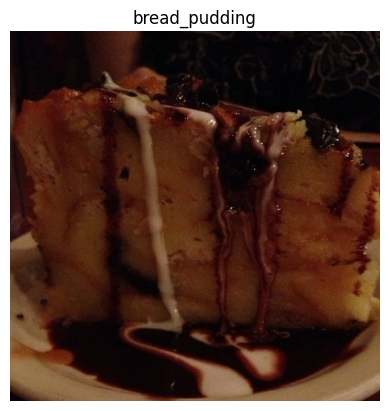

In [19]:
#we already have the image so let's do it
import matplotlib.pyplot as plt

image = tf.cast(image, tf.float32)
plt.imshow(image/255.)
plt.title(class_names[label.numpy()])
plt.axis(False)

## Create preprocessing functions for our data

Neural networks best perform when they are in a certain way (e.g batch, normalized etc)

However not all data (including data from tensorflow datasets come like this)

So in order to get ready for the neural network we need to write some preprocessing functions and map it to our data

What we know about our data:
* In `uin8` data type
* comprised of all different types of tensor(different types of images)
* Images are not normalized( they're between 0 and 255)

What we know model like:
* Data in `float32` dtype(or for mixed precision `float16`  & `float32`)
* For batches tensorflow likes all of them in batches and of the same size
* scaled (values between 0 and 1) also called normalized tensors generally perform better

since we're going to use EfficientnetBx pretrained model from tensorflow.keras.applications we dont need to rescale our data(these architectures have already builtin layers for rescaling other models would need a rescaling preprocessing layer)

This means our function needs to:
* Resize the images to be of same size
* Convert the dtype of our image from `uin8` to `float32`



In [20]:
#make a fucntion for our preprocessing images
def preprocess_img(image , label, img_shape = 224):
  """
  Converts image datatype from 'uint8' -> 'float32'
  and resize the image into [img_shape,img_shape,color_channel = 3]
  """
  image = tf.image.resize(image, [img_shape,img_shape])
  # image = image/255. #scale image values (not required for EfficientnetBx models)
  return tf.cast(image, tf.float32) , label #return a tuple of [float32_image, label]

In [21]:
#preprocess a single sample and check the outputs
preprocessed_img = preprocess_img(image,label)[0]
print(f'Image before preprocessing:\n {image[:2]}\n Image shape :{image.shape}\n Image datatype :{image.dtype}\n')
print(f'Image after preprocessing :\n {preprocessed_img[:2]} \n Preprocessed image shape:{preprocessed_img.shape}\n Image Datatype: {preprocessed_img.dtype}')

Image before preprocessing:
 [[[18.  6.  8.]
  [18.  6.  8.]
  [18.  6.  8.]
  ...
  [30. 15. 22.]
  [29. 14. 21.]
  [26. 11. 18.]]

 [[22. 10. 12.]
  [21.  9. 11.]
  [20.  8. 10.]
  ...
  [35. 20. 27.]
  [31. 16. 23.]
  [26. 11. 18.]]]
 Image shape :(512, 512, 3)
 Image datatype :<dtype: 'float32'>

Image after preprocessing :
 [[[20.158163   8.158163  10.158163 ]
  [18.42347    7.6173472  9.020408 ]
  [15.010203   6.423469   9.285714 ]
  ...
  [26.285824  15.714351  23.07156  ]
  [31.091867  17.285728  24.285728 ]
  [28.754953  13.754952  20.754953 ]]

 [[18.92857    8.928571   9.928571 ]
  [16.214285   7.0765305  8.07653  ]
  [14.739796   8.571429  10.627551 ]
  ...
  [26.444029  15.872557  21.658293 ]
  [39.86226   26.862259  33.86226  ]
  [39.49479   24.494787  31.494787 ]]] 
 Preprocessed image shape:(224, 224, 3)
 Image Datatype: <dtype: 'float32'>


## Batch and prepare datasets

we're going to make our datainput line very fast

for more resources check out the link : https://www.tensorflow.org/guide/data_performance

In [22]:
#Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)
#shuffle train_data and turn it into batches
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size =32).prefetch(buffer_size = tf.data.AUTOTUNE)#it will going to shuffle 1000 samples at a time you can increase the size depending on the memory you have


#Map preprocessing function to test data
test_data = test_data.map(map_func = preprocess_img,num_parallel_calls = tf.data.AUTOTUNE)
test_data = test_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(tf.data.AUTOTUNE)

>**Note:** tf.data.AUTOTUNE will tune values automatically during runtime . Tuning means it will select random values during the runing time

num parallel_call will parallize and use as many processors in parallel

we can store the preprocessed images in `.cache()` to load them faster

In [23]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

'Hey ,tensorflow map this preprocessing function(preprocess_img) across our training set and shuffle the number of elements and batch them together and finally make sure you prepare the batches (prefetch) while the model is looking through finding the patterns into the current batch'

prefetch saves the time and this gives us the best performant pipeline

## Create modelling Callbacks

Callbacks are necessary to run these useful functions while the model is running. so we will be preparing a feature extraction model

* Tensorboard callback to log training results( so we can visualize them later when need to be)
* Model checkpoint to save our model progress after the Feature extraction model

In [24]:
#create tensorboard callback (from helper_functions.py)
from helper_functions import create_tensorboard_callback

#create a model checkpoint callback to save model progress during training
checkpoint_path = 'model_checkpoint.h5/ck.ckpt'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                      monitor = 'val_accuracy',
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0)#dont print whether or not model is being saved


## Setup [Mixed precision](https://www.tensorflow.org/guide/mixed_precision) Training

`Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training` to make it run faster and use less memory. By keeping certain parts of the model in the 32-bit types for numeric stability, the model will have a lower step time and train equally as well in terms of the evaluation metrics such as accuracy.

The Keras mixed precision API allows you to use a mix of either float16 or bfloat16 with float32, to get the performance benefits from float16/bfloat16 and the numeric stability benefits from float32.

In [25]:
#Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
#set global data policy to mixed precision -it will be mixed with float32 to increase the performance and float32 will be there for the stability

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

>**Note:** our model will run the tasks in float16 and it will store the numbers in float32 for the numeric stability. so you need to keep the output layer dtype = float32

##Build Feature Extraction model

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)#we will create our own output layers
base_model.trainable = False

#create Functional model
inputs = layers.Input(shape = input_shape, name = 'input_layer')
#Note: Efficientnet models have builtin rescaling layers if your model dont you can add
# x = preprocessing.Rescaling(1/255.)
x = base_model(inputs, training = False) #you need to pass the layers inside the model and other than that you need to keep at right of it
x = layers.GlobalAveragePooling2D()(x)#it will average all the features
x = layers.Dense(101)(x)
#create the output layer
outputs = layers.Activation('softmax',dtype = tf.float32,name = 'softmax_float32')(x)

model = tf.keras.Model(inputs,outputs)

#compile the model
model.compile(loss = 'sparse_categorical_crossentropy',#if our labels are onehot encoded then we can use categorical_cross if they are in
              optimizer = tf.keras.optimizers.Adam(), #integers then use sparse_categorical_cross_entropy
              metrics = 'accuracy')

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

##checking layer dtype policies

In [ ]:
for layers in model.layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Going through the above we see:
* `layer.name`- The human readable name
* `layer.trainable` - is the layers trainable or not (if false then weights are frozen)
* `layers.dtype` - The datatype the layer stores variables in
* `layers.dtype_policy` - The datatype policy of a layer computes on it variables with

In [ ]:
#check the dtype policy for efficientnet
for layers in model.layers[1].layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)


input_24 False float32 <Policy "float32">
rescaling_46 False float32 <Policy "mixed_float16">
normalization_23 False float32 <Policy "mixed_float16">
rescaling_47 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False f

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

##Fit the feature extraction model
if your goal is to fine-tune the pretrained model ,the general order of things to do:
> Build a feature extraction model(train a couple of output layers with base layers frozen)
> Fine-tune some of the frozen layers


In [34]:
#let's fit the feature extraction model for 3 epochs
history_for_feature_extraction = model.fit(train_data,
                                           epochs = 3,
                                           validation_data = test_data,
                                           validation_steps = len(test_data),
                                           callbacks = [create_tensorboard_callback(dir_name = 'tensorboard_callback',
                                                                                    experiment_name = 'feature_extraction_model_for_food101'),
                                                        model_checkpoint])#this will save the weights of feature extraction model

2368/2368 [==============================] - 285s 116ms/step - loss: 1.7144 - accuracy: 0.5840 - val_loss: 1.1365 - val_accuracy: 0.7019
Epoch 2/3
2368/2368 [==============================] - 282s 117ms/step - loss: 1.1995 - accuracy: 0.6895 - val_loss: 1.0355 - val_accuracy: 0.7213
Epoch 3/3
2368/2368 [==============================] - 245s 102ms/step - loss: 1.0548 - accuracy: 0.7246 - val_loss: 1.0001 - val_accuracy: 0.7273


In [ ]:
#evaluate model on whole test data
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 64s 78ms/step - loss: 1.0002 - accuracy: 0.7297


[1.0001832246780396, 0.7297029495239258]

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
model.save_weights('/content/drive/MyDrive/tensorflow models/feature_extraction_model_weights_for_food_vision/')

## Load and evaluate checkpoint weights

create a function called create_model() to make a new base model cuz we want to compile the model everytime we make changes in it

To evaluate our model we can use `tf.keras.models.clone_model` to clone our functional model

There is some problem with `tf.keras.models.clone_model` it cannot clone the model properly and the previous and this clone model results are different . so we created a `create_model` function

In [ ]:
#create and compile the model
# created_model_with_loaded_weights = tf.keras.models.clone_model(model)
# created_model_with_loaded_weights.compile(loss = 'sparse_categorical_crossentropy',
#                                           optimizer = 'Adam',
#                                           metrics = ['accuracy'])

In [ ]:
# Clone the model we created (this resets all weights)
# cloned_model = tf.keras.models.clone_model(model)
# cloned_model.summary()

# # Load checkpointed weights into cloned_model
# cloned_model.load_weights(checkpoint_path)

# # Compile cloned_model (with same parameters as original model)
# cloned_model.compile(loss="sparse_categorical_crossentropy",
#                      optimizer=tf.keras.optimizers.Adam(),
#                      metrics=["accuracy"])

In [27]:
from tensorflow.keras import layers

In [28]:
def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
  # x = layers.Rescaling(1./255)(x)
  x = base_model(inputs, training=False) # set base_model to inference mode only
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = layers.Dense(101)(x) # want one output neuron per class
  # Separate activation of output layer so we can output float32 activations
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model



In [36]:
# 2. Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights('/content/drive/MyDrive/tensorflow models/feature_extraction_model_weights_for_food_vision/')

# status.expect_partial()

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

790/790 [==============================] - 67s 75ms/step - loss: 1.0002 - accuracy: 0.7297


so finally i have never faced this many errors or an error who had took so long to resolve . so it's simple if things don't work take a break come again , clear the cache and rerun the things most of the time it gets solved if there is no error in the code

In [ ]:
import numpy as np
np.isclose(results_feature_extraction_model,results_created_model_with_loaded_weights)

array([ True,  True])

##Fine-tuning the big model

1. so we have our fine-tuning model now we can perform experiment on it and if the results doesn't seem improving we can reset it again to the feature extraction

In [ ]:
#check the dtype policy to see it is ready for mixed precision
for layer in created_model.layers[1].layers[-5:]:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

block7a_project_conv False float32 <Policy "mixed_float16">
block7a_project_bn False float32 <Policy "mixed_float16">
top_conv False float32 <Policy "mixed_float16">
top_bn False float32 <Policy "mixed_float16">
top_activation False float32 <Policy "mixed_float16">


so let's save the model so whenever we need we can start it from the loaded model

In [ ]:
## Saving model to Google Drive (optional)
# Create save path to drive
save_dir = "drive/MyDrive/tensorflow_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/"
# os.makedirs(save_dir) # Make directory if it doesn't exist

In [ ]:
# Save model
created_model.save(save_dir) #this will save the feature extraction cloned model to google drive

>Here comes our loaded model on which we gonna perform fine tuning

In [ ]:
#Run this commnad to directly load the model from the google drive
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/tensorflow/07_efficientnetb0_feature_extract_model_mixed_precision/')

In [ ]:
loaded_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [ ]:
#lets check the accuracy score of our downloaded model
results_for_downloaded_model = loaded_model.evaluate(test_data)

790/790 [==============================] - 67s 79ms/step - loss: 1.0002 - accuracy: 0.7297


In [ ]:
import numpy as np
np.isclose(results_created_model_with_loaded_weights,results_for_downloaded_model)


array([ True,  True])

In [ ]:
##Making predictions with our trained model
pred_probs = loaded_model.predict(test_data)

790/790 [==============================] - 61s 73ms/step


In [ ]:
len(test_data)

790

In [ ]:
len(pred_probs)#there is single for each image

25250

In [ ]:
# we get one prediction probabilty per class (in our case there's 101 prediction probabilty)
print(f'Number of prediction probability for class 0 : {len(pred_probs[0])}')
print(f'what prediction probability sample looks like :\n {pred_probs[0]}')
print(f'The class with the highest probability by the model for sample 0: {pred_probs[0].argmax()}')

Number of prediction probability for class 0 : 101
what prediction probability sample looks like :
 [2.96814324e-06 8.70423662e-08 9.78643726e-08 8.50964010e-09
 3.24302043e-08 5.39930802e-08 5.59250388e-08 1.58694490e-07
 7.90211345e-08 2.26841941e-08 2.06108153e-09 3.54095278e-08
 2.26841941e-08 3.78407741e-08 3.35906094e-08 1.26479392e-06
 3.88897590e-08 2.51128625e-07 4.18308503e-07 4.74487893e-10
 1.17031448e-06 4.74629616e-08 1.32464777e-07 2.91840259e-08
 4.68960037e-10 6.27461461e-09 1.01449995e-08 8.61123439e-08
 9.36288491e-10 1.49955753e-07 1.02560975e-07 1.91393514e-08
 3.97073882e-06 9.99965072e-01 6.60147670e-09 1.47897445e-08
 1.39910682e-07 7.31917225e-07 1.38395135e-08 1.97469010e-08
 2.44354879e-07 3.42480111e-09 2.54050914e-08 5.39385553e-07
 1.43110140e-06 3.10557056e-07 5.37665301e-10 3.15447608e-07
 1.64557991e-06 8.49430393e-08 1.23591377e-07 9.84394717e-08
 2.85122354e-07 6.13017903e-08 7.26339433e-10 2.23761685e-08
 6.38683915e-08 3.20258749e-07 1.32574431e-08 

In [37]:
class_names[33]

'edamame'

In [ ]:
#to get our test labels we need to unravel our test_data batch_dataset
y_labels = []
for images, labels in test_data.unbatch():
  # print(len(labels))
  y_labels.append(labels.numpy().argmax())#Currently test labels look like [0 0 0 1 ...] so the argmax index to the highest value
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#there is prediction probability of each image
pred_probs[0]

array([1.0567126e-04, 1.4854005e-06, 4.1000984e-08, 2.7526758e-08,
       4.4519434e-06, 1.0366671e-08, 2.9540720e-06, 2.9240543e-09,
       5.7942339e-07, 6.5519380e-08, 1.8811124e-07, 1.7127724e-07,
       9.2397144e-08, 8.8857462e-08, 6.3522525e-06, 4.4936197e-09,
       6.1809110e-06, 4.7935004e-08, 2.2642892e-08, 3.0754579e-11,
       7.6003808e-08, 1.9678359e-06, 9.4049705e-07, 9.9425298e-01,
       1.8298263e-09, 6.0850853e-06, 1.0740813e-06, 1.9566316e-05,
       2.0616588e-08, 5.5405330e-06, 4.4599815e-07, 2.3096377e-06,
       2.2999465e-08, 1.3311070e-08, 2.2772557e-09, 2.2291848e-08,
       1.4505581e-08, 6.7214290e-07, 4.2724002e-07, 4.0051194e-08,
       2.2171540e-05, 3.8435961e-09, 7.3092153e-08, 1.7402641e-05,
       4.3658356e-06, 9.6860285e-06, 1.4310748e-07, 7.6599918e-08,
       7.9317092e-10, 7.4131516e-05, 1.2220396e-05, 1.1450760e-09,
       1.5936022e-06, 5.7837919e-06, 6.6411392e-09, 5.7164089e-06,
       1.2407281e-08, 2.8460320e-07, 2.3463597e-05, 5.9191834e

In [ ]:
#lets get our y_preds
y_preds = pred_probs.argmax(axis = 1)
#y prediction classes
y_preds[:10]

array([23, 16,  1, 70,  7, 31, 64, 27,  5, 49])

In [ ]:
#to get better accuracy the test data should not be shuffled or use the random seed to get same random images
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true = y_labels,
                          y_pred = y_preds)
accuracy

0.0100990099009901

as our test data is shuffled it can't help us getting the good accuracy score

##Preparing our model layers for Fine-tuning

>🔑 Note: It's worth remembering a traditional workflow for fine-tuning is to freeze a pre-trained base model and then train only the output layers for a few iterations so their weights can be updated inline with your custom data (feature extraction). And then unfreeze a number or all of the layers in the base model and continue training until the model stops improving.

In [ ]:
#feature_extraction model
loaded_model.layers

In [ ]:
#set all the layers trainable (if your model is small less than 100 classes then train only few layers otherwise it may cause overfitting)
for i,layers in enumerate(loaded_model.layers):
  layers.trainable = True
  print(i,layers.name,layers.trainable,layers.dtype,layers.dtype_policy)

0 input_layer True float32 <Policy "float32">
1 efficientnetb0 True float32 <Policy "mixed_float16">
2 pooling_layer True float32 <Policy "mixed_float16">
3 dense_2 True float32 <Policy "mixed_float16">
4 softmax_float32 True float32 <Policy "float32">


So alright it seems all of our loaded model layers are trainable.should we dig deeper to layer to check it and check the dtype policy

In [ ]:
#check the efficientnet layer
for i, layers in enumerate(loaded_model.layers[1].layers[:10]):
  print(i,layers.name,layers.trainable,layers.dtype,layers.dtype_policy)


0 input_3 True float32 <Policy "float32">
1 rescaling_4 True float32 <Policy "mixed_float16">
2 normalization_2 True float32 <Policy "mixed_float16">
3 rescaling_5 True float32 <Policy "mixed_float16">
4 stem_conv_pad True float32 <Policy "mixed_float16">
5 stem_conv True float32 <Policy "mixed_float16">
6 stem_bn True float32 <Policy "mixed_float16">
7 stem_activation True float32 <Policy "mixed_float16">
8 block1a_dwconv True float32 <Policy "mixed_float16">
9 block1a_bn True float32 <Policy "mixed_float16">


Wonderful it look like each of our models layer is trainable (unfrozen) and has a dtype policy of `mixed_float16`

>**Note:** Now we will training our fine-tuning model with 101 food classes our goal is to beat deepfood accuracy .

so the model we are will train it for 100 epochs which is default and it surely gonna take a long time so we need to introduce few callbacks which will help us to train this huge model

The EarlyStopping callback monitors a specified model performance metric (e.g. val_loss) and when it stops improving for a specified number of epochs, automatically stops training.

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
# Monitor the val_loss and stop training if it doesn't improve for 3 epochs
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for more
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  )

#Create modelcheckpoint callback to save the best model during fine-tuning
checkpoint_dir = '/content/drive/MyDrive/tensorflow/fine_tuning.h5/checkpoint.ckpt'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_dir,
                                                      monitor = 'val_loss',
                                                      save_best_only = True)#it will save the best model and the previous model will be overwritten


Now we are all set for the fine tuning but we got a see one more callback `ReduceLRonplateau`

Remember how the learning rate is the most important model hyperparameter you can tune? (if not, treat this as a reminder).

Well, the ReduceLROnPlateau callback helps to tune the learning rate for you.

Like the ModelCheckpoint and EarlyStopping callbacks, the ReduceLROnPlateau callback montiors a specified metric and when that metric stops improving, it reduces the learning rate by a specified factor (e.g. divides the learning rate by 10).

we reduce it so model can go deeper and it should not update the efficientnet model patterns


🤔 Question: Why lower the learning rate?

Imagine having a coin at the back of the couch and you're trying to grab with your fingers.

Now think of the learning rate as the size of the movements your hand makes towards the coin.

The closer you get, the smaller you want your hand movements to be, otherwise the coin will be lost.

Our model's ideal performance is the equivalent of grabbing the coin. So as training goes on and our model gets closer and closer to it's ideal performance (also called convergence), we want the amount it learns to be less and less.

To do this we'll create an instance of the ReduceLROnPlateau callback to monitor the validation loss just like the EarlyStopping callback.

Once the validation loss stops improving for two or more epochs, we'll reduce the learning rate by a factor of 5 (e.g. 0.001 to 0.0002).

And to make sure the learning rate doesn't get too low (and potentially result in our model learning nothing), we'll set the minimum learning rate to 1e-7.

In [ ]:
#create a ReduceLRonplateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                 monitor="val_loss",
                  factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                  patience=2,
                  verbose=1, # print out when learning rate goes down
                  min_lr=1e-7 #to see our model lr should not get so less that it stops learning
              )

In [ ]:
#compile the model and use `sparse_categorical_crossentropy` and lower the adam learning rate by 10 x
loaded_model.compile(loss = 'sparse_categorical_crossentropy',#as we don't have hot encoded labels they're in int
                     optimizer = tf.keras.optimizers.Adam(0.0001), #reduce it by 10 x from the default
                     metrics = ['accuracy'])

>🔑**Note:** So running below code will fine-tune all of the pretrained weights of the base model so using unoptimized data and without mixed precision it will surely take a long time for all of the food101 daat

so let's do it...


In [ ]:
#start to fine_tune all of the layers
history_101_food_classes_fine_tune = loaded_model.fit(train_data,
                                                      epochs = 100,
                                                      steps_per_epoch = len(train_data),
                                                      validation_data = test_data,
                                                      validation_steps = int(0.15 * len(test_data)),
                                                      callbacks = [create_tensorboard_callback(dir_name = 'tensorboard_callback',
                                                                                               experiment_name = 'efficientnet_fine_tune_model'),
                                                                   model_checkpoint,#save the best model during training
                                                                   early_stopping,#stops the model of x epochs stops improvement
                                                                   reduce_lr #reduce the learning rate if x epochs of no improvement seen
                                                                   ])

Saving TensorBoard log files to: tensorboard_callback/efficientnet_fine_tune_model/20230701-163953
Epoch 1/100
2368/2368 [==============================] - 458s 173ms/step - loss: 0.8708 - accuracy: 0.7658 - val_loss: 0.7782 - val_accuracy: 0.7826 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 411s 172ms/step - loss: 0.5369 - accuracy: 0.8512 - val_loss: 0.7560 - val_accuracy: 0.7926 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 378s 158ms/step - loss: 0.3018 - accuracy: 0.9149 - val_loss: 0.8538 - val_accuracy: 0.7860 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1588 - accuracy: 0.9531
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 379s 159ms/step - loss: 0.1588 - accuracy: 0.9531 - val_loss: 0.9069 - val_accuracy: 0.7924 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 374s 157ms/step 

In [ ]:
#so lets load our saved model from the drive
loaded_fine_tune_model = tf.keras.models.load_model(checkpoint_dir)

In [ ]:
loaded_fine_tune_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [ ]:
#let's evaluate our fine tune model with the full test data
results_loaded_fine_tune_model = loaded_fine_tune_model.evaluate(test_data)

790/790 [==============================] - 64s 76ms/step - loss: 0.7610 - accuracy: 0.7898


Excellent! Our saved model is performing as expected (better results than the DeepFood paper!).we already beatt the deepfood paper and in very less time

just trained a computer vision model with competitive performance to a research paper and in far less time (our model took ~20 minutes to train versus DeepFood's quoted 2-3 days).

In [ ]:
# Upload experiment results to TensorBoard (uncomment to run)
# !tensorboard dev upload --logdir ./tensorboard_callback \
#   --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
#   --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
#   --one_shot

so we uploaded  our tensorboard results let's have an look towards them
https://tensorboard.dev/experiment/KjMMQqy1RzeFwIoFzD4kNg/